# Exploratory Data Analysis

This notebook is part of my work for the DPS AI Challenge. Here, I will play around with the data and create visualizations.

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
# read data
data = pd.read_csv('../data/monatszahlen2405_verkehrsunfaelle_export_31_05_24_r.csv')
data.shape

(2254, 9)

In [119]:
# keep only relevant data
data = data.iloc[:, :5]
data.dropna(inplace=True, axis=0)
data.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
24,Alkoholunfälle,insgesamt,2022,Summe,493.0
25,Alkoholunfälle,insgesamt,2022,202201,19.0
26,Alkoholunfälle,insgesamt,2022,202202,32.0
27,Alkoholunfälle,insgesamt,2022,202203,28.0
28,Alkoholunfälle,insgesamt,2022,202204,34.0


In [120]:
print(data['MONATSZAHL'].unique())
print(data['AUSPRAEGUNG'].unique())
# filter data according to challenge constraints
data = data[(data['AUSPRAEGUNG'] == 'insgesamt') & (data['MONATSZAHL'] == 'Alkoholunfälle')]

['Alkoholunfälle' 'Fluchtunfälle' 'Verkehrsunfälle']
['insgesamt' 'Verletzte und Getötete' 'mit Personenschäden']


In [121]:
def convert_Monat_to_Months(value):
    try:
        int(value)
        return value[-2:]
    except ValueError:
        return np.nan
# simply type conversion, filtering out months.
data['MONAT'] = data['MONAT'].apply(convert_Monat_to_Months)
data.dropna(inplace=True)
data.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
25,Alkoholunfälle,insgesamt,2022,01,19.0
26,Alkoholunfälle,insgesamt,2022,02,32.0
27,Alkoholunfälle,insgesamt,2022,03,28.0
28,Alkoholunfälle,insgesamt,2022,04,34.0
29,Alkoholunfälle,insgesamt,2022,05,57.0


In [122]:
data['TIMESTAMP'] = pd.to_datetime(data["JAHR"].astype(str) + data["MONAT"], format='%Y%m')
data = data.sort_values('TIMESTAMP').reset_index(drop=True)

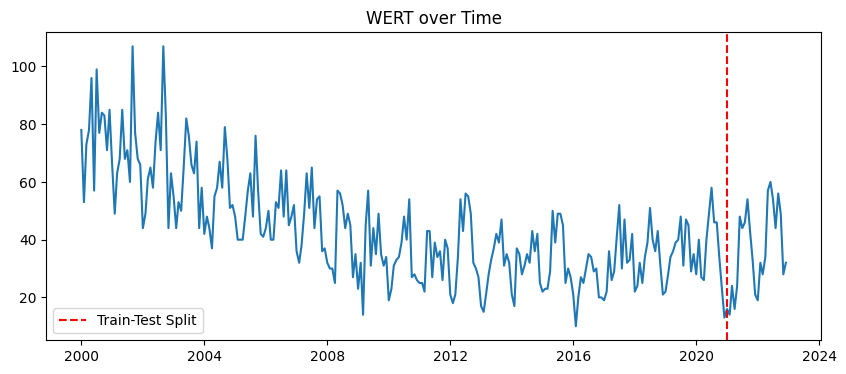

In [123]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
# ax.s
ax.set_title('WERT over Time')
ax.plot(data['TIMESTAMP'], data['WERT'])
ax.axvline(x=pd.to_datetime('202101', format='%Y%m'), color="red", linestyle="--", label="Train-Test Split")
plt.legend()
plt.show()

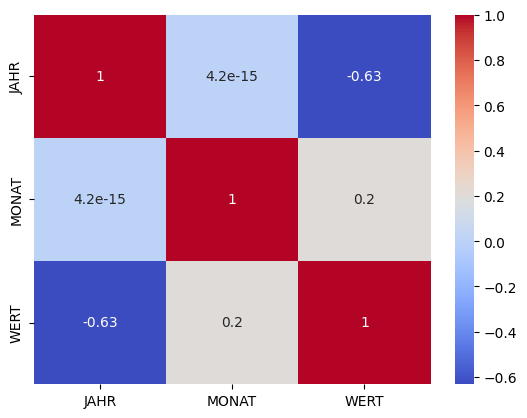

In [127]:
data['MONAT'] = data['MONAT'].astype('int')
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

With this I have concluded that forecasting with seasonal methods (using Prophet) is the way I'll be moving forward.